# Compare different scikit learn classifiers

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import decomposition
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from IPython.display import clear_output
import timeit



## Load subject data

In [13]:
# Set test subject
subj = 0

# Load subject data
df = pd.read_csv('%i_all_task.csv'%subj, index_col=0)

# Task exclusion
exclude_task_nums = []
df = df[~(df['task_num'].isin(exclude_task_nums))] 

# Subset to minimum number of trials per task
num_trials = []
for task_num_ind in np.unique(df.task_num):
    num_trials.append(df[df['task_num']==task_num_ind].shape[0])

df_sub = df.iloc[0:1,:] # initialize a 1-row dataframe for concatenation

for task_num_ind in np.unique(df.task_num):
    df_temp = df[df['task_num']==task_num_ind].sample(min(num_trials),axis=0)
    df_sub = pd.concat((df_sub, df_temp),axis=0)

df_sub = df_sub.iloc[1:] # remove the initialized row

# Split into train and test sets
X = df_sub.loc[:,'R_V1':'L_p24']
y = df_sub.loc[:,'task_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [14]:
df_sub.head()

,subject,task_name,task_num,R_V1,R_MST,R_V6,R_V2,R_V3,R_V4,R_V8,...,L_p47r,L_TGv,L_MBelt,L_LBelt,L_A4,L_STSva,L_TE1m,L_PI,L_a32pr,L_p24
556,0,rest,0,-101.169583,32.717267,45.646667,10.811500,-10.326417,28.803583,95.031750,...,-61.398583,15.639308,53.071333,68.110083,150.713267,4.621000,6.273800,229.176833,-61.130500,-65.121000
2418,0,rest,0,53.423500,9.095842,29.343167,111.785417,110.261000,173.609417,177.340083,...,111.340667,83.003800,-90.170833,-57.854208,-62.126008,-29.617500,34.909900,3.579000,-45.889333,155.959750
1034,0,rest,0,40.730417,-14.042733,7.146667,10.611500,-4.626417,-66.196417,-23.868250,...,-0.598583,84.689308,22.971333,26.010083,25.123267,-68.879000,-27.196200,74.576833,21.069500,46.379000
1277,0,rest,0,-203.640833,-58.789033,-98.264833,-123.260750,-101.507250,-69.403333,-76.816833,...,26.659333,22.271092,-33.328917,-13.771250,-28.988125,-93.003750,-73.720858,-20.713417,20.764083,31.102000
4418,0,rest,0,-38.157250,106.871583,128.791500,84.003250,107.235417,89.833417,84.240167,...,60.488083,98.688192,189.776417,56.744758,135.118508,26.127667,12.252908,51.333000,-211.026917,-44.281667


## Run KNN clf over all subj

In [23]:
# set number of subjects to run analysis over
num_total_subs = 10

# Set K for KNN classifier
K = 3

# Initialize scores holder
scores = []

# Initialize a loop counter for monitoring
i = 1

# loop over all subjects and perform KNN
for subj in range(num_total_subs):
    
    clear_output(wait=True)

    # Load subject data
    df = pd.read_csv('%i_all_task.csv'%subj, index_col=0)

    # Task exclusion
    exclude_task_nums = []
    df = df[~(df['task_num'].isin(exclude_task_nums))] 

    # Subset to minimum number of trials per task
    num_trials = []
    for task_num_ind in np.unique(df.task_num):
        num_trials.append(df[df['task_num']==task_num_ind].shape[0])

    df_sub = df.iloc[0:1,:] # initialize a 1-row dataframe for concatenation

    for task_num_ind in np.unique(df.task_num):
        df_temp = df[df['task_num']==task_num_ind].sample(min(num_trials),axis=0)
        df_sub = pd.concat((df_sub, df_temp),axis=0)

    df_sub = df_sub.iloc[1:] # remove the initialized row

    # Split into train and test sets
    X = df_sub.loc[:,'R_V1':'L_p24']
    y = df_sub.loc[:,'task_num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit and test classifier
    clf = KNeighborsClassifier(K)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    print('Current Percent Done:', round(i/num_total_subs*100,4))
    print('Current Mean Score:  ', round(np.mean(scores),4))
    
    # Update loop counter
    i+=1
    
#     plot_confusion_matrix(clf,X_test, y_test)
#     plt.show()

Current Percent Done: 100.0
Current Mean Score:   0.8298


## Run PCA to return first two leading PCs of parcel data

In [24]:
scores = []
for n in range(1,X.shape[1]+1):
    pca = decomposition.PCA(n_components=n)
    pca.fit(X)
    X_2 = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2)

    # Fit and test classifier
    clf = KNeighborsClassifier(5)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))


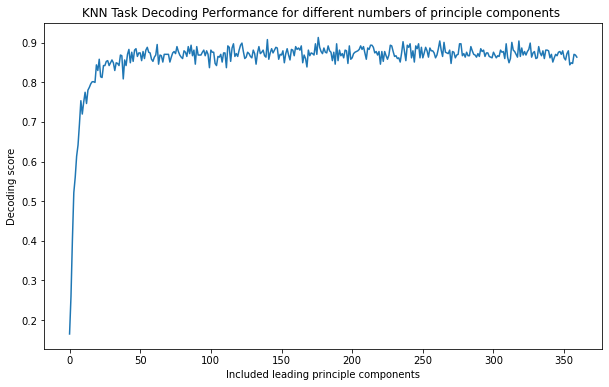

In [25]:
figure = plt.figure(figsize=(10, 6),facecolor='white')
plt.plot(scores)
plt.xlabel("Included leading principle components")
plt.ylabel("Decoding score")
plt.title("KNN Task Decoding Performance for different numbers of principle components ")
plt.show()
figure.savefig('Decoding_by_PCs.png')

## Compare Classifier Performances

### Load the data into a datasets holder that will be passed into classifier comparison script

In [26]:
# Designate subjects to test
subjects_to_test = range(5)

# initialize empty datasets holder
datasets = [] 

# iterate through subjects_to_test, loading df into datasets holder
for subj in subjects_to_test:
    
    # Load subject data
    df = pd.read_csv('%i_all_task.csv'%subj, index_col=0)

    # Task exclusion
    exclude_task_nums = []
    df = df[~(df['task_num'].isin(exclude_task_nums))] 
    
    # Make new column: RestOrTask
    df['RestOrTask']=df['task_num']
    df.loc[df['RestOrTask']>0, 'RestOrTask']=1

        
    
    #######################################################################################
    ######### Uncomment this section for binary classifaction: rest or task state #########
    #######################################################################################
    # Subset to minimum number of trials per task state (Rest Or Task)
    num_trials = []
    for task_num_ind in np.unique(df.RestOrTask):
        num_trials.append(df[df['RestOrTask']==task_num_ind].shape[0])

    df_sub = df.iloc[0:1,:] # initialize a 1-row dataframe for concatenation

    for task_num_ind in np.unique(df.RestOrTask):
        df_temp = df[df['RestOrTask']==task_num_ind].sample(min(num_trials),axis=0)
        df_sub = pd.concat((df_sub, df_temp),axis=0)

    df_sub = df_sub.iloc[1:] # remove the initialized row
    
    # Identify original features and labels
    X = df_sub.loc[:,'R_V1':'L_p24']
    y = df_sub.loc[:,'RestOrTask']
    
    
    
    #######################################################################################
    ######### Uncomment this section for full task classifaction: 8 states total ##########
    #######################################################################################
#     # Subset to minimum number of trials per task
#     num_trials = []
#     for task_num_ind in np.unique(df.task_num):
#         num_trials.append(df[df['task_num']==task_num_ind].shape[0])

#     df_sub = df.iloc[0:1,:] # initialize a 1-row dataframe for concatenation

#     for task_num_ind in np.unique(df.task_num):
#         df_temp = df[df['task_num']==task_num_ind].sample(min(num_trials),axis=0)
#         df_sub = pd.concat((df_sub, df_temp),axis=0)

#     df_sub = df_sub.iloc[1:] # remove the initialized row
    
#     # Identify original features and labels
#     X = df_sub.loc[:,'R_V1':'L_p24']
#     y = df_sub.loc[:,'task_num']



    # PCA to reduce feature dimensions to 2
    pca = decomposition.PCA(n_components=10)
    pca.fit(X)
    X = pca.transform(X)
    X = X[:,0:2]
    datasets.append((X,y))



### Classifier comparison script. Loops over contents of datasets (subjects) and loops over different classifiers

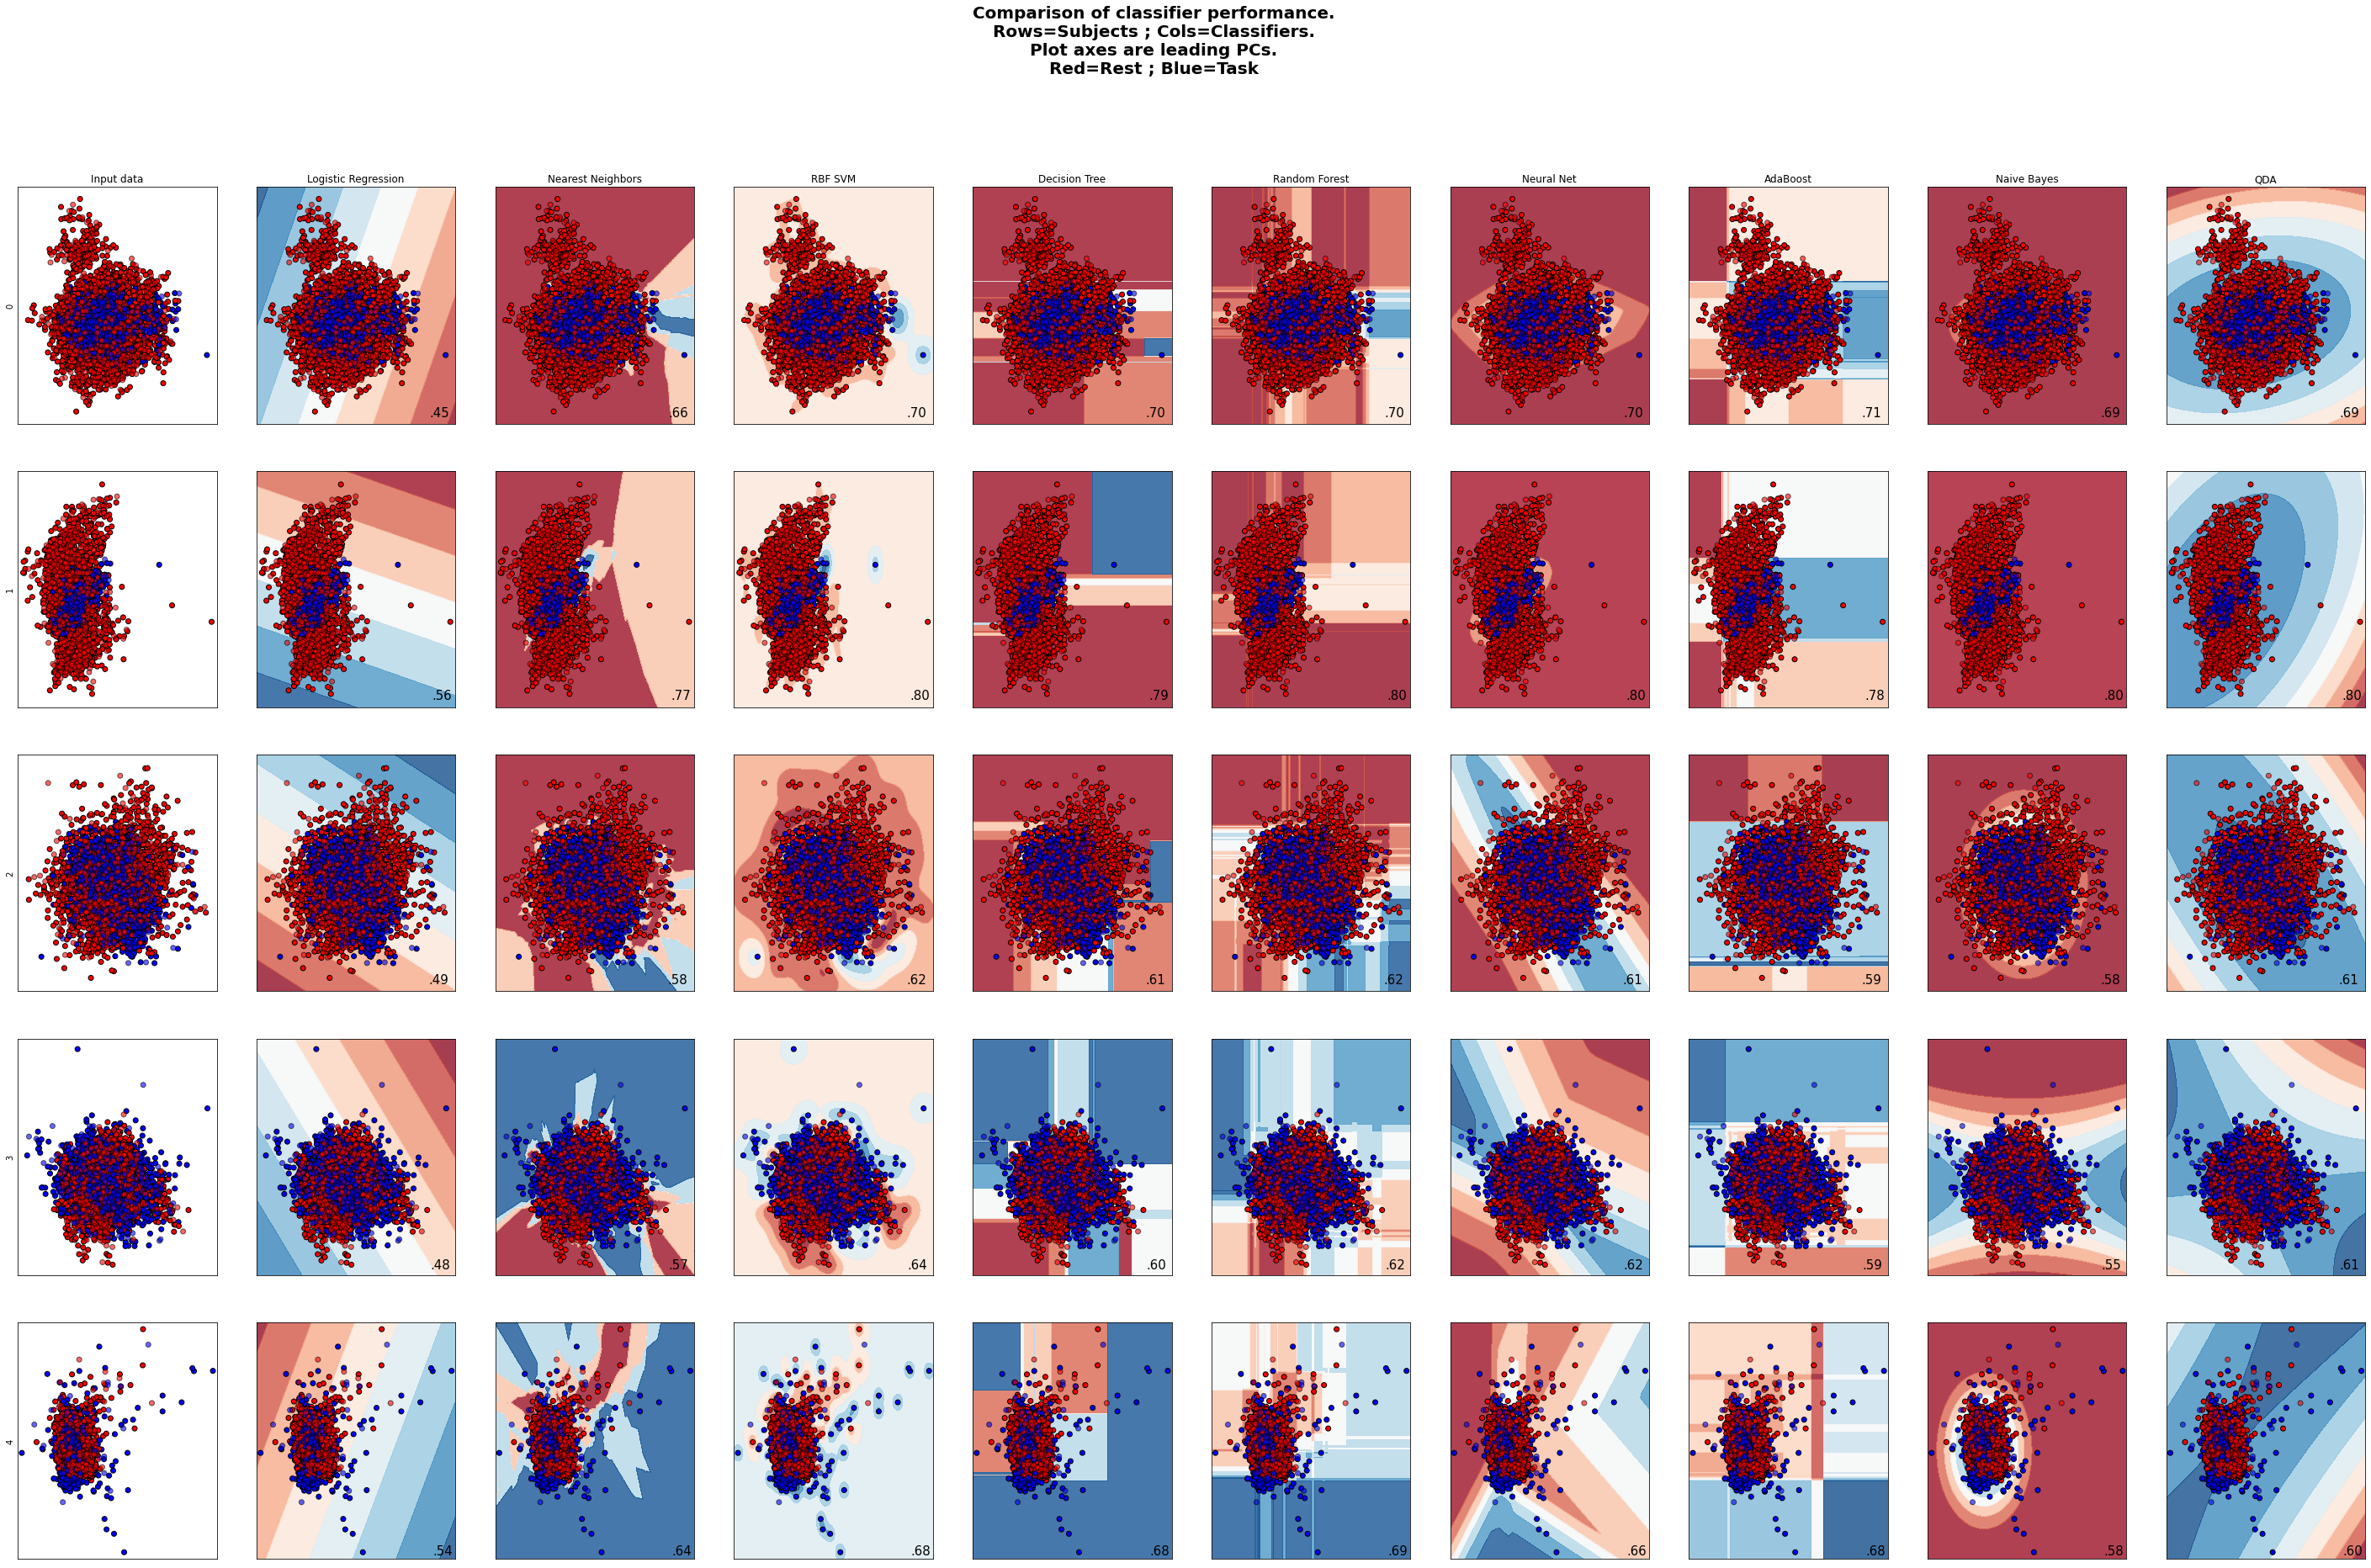

In [27]:
h = .02  # step size in the mesh
figure = plt.figure(figsize=(50, 30),facecolor='white')
figure.suptitle('Comparison of classifier performance.\nRows=Subjects ; Cols=Classifiers.\nPlot axes are leading PCs.\nRed=Rest ; Blue=Task',fontsize=20, fontweight='bold')


    
####################################################################################
######### Fast list of classifiers #################################################
####################################################################################
names = ["Logistic Regression", "Nearest Neighbors","RBF SVM",
     "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
     "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
    
    
####################################################################################
######### List of classifiers plus logistic regression #############################
####################################################################################
#     names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
#          "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#          "Naive Bayes", "QDA"]

#     classifiers = [
#         LogisticRegression(),
#         KNeighborsClassifier(3),
#         SVC(kernel="linear", C=0.025),
#         SVC(gamma=2, C=1),
#         GaussianProcessClassifier(1.0 * RBF(1.0)),
#         DecisionTreeClassifier(max_depth=5),
#         RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#         MLPClassifier(alpha=1, max_iter=1000),
#         AdaBoostClassifier(),
#         GaussianNB(),
#         QuadraticDiscriminantAnalysis()]
    
    
####################################################################################
######### Original list of classifiers #############################################
####################################################################################
#     names = ["Nearest Neighbors", "RBF SVM", "Gaussian Process",
#          "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#          "Naive Bayes", "QDA"]

#     classifiers = [
#         KNeighborsClassifier(3),
#         SVC(gamma=2, C=1),
#         GaussianProcessClassifier(1.0 * RBF(1.0)),
#         DecisionTreeClassifier(max_depth=5),
#         RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#         MLPClassifier(alpha=1, max_iter=1000),
#         AdaBoostClassifier(),
#         GaussianNB(),
#         QuadraticDiscriminantAnalysis()]



i = 1

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
#     cm_bright = ListedColormap(['#FF0000', '#0000FF', '#000FFF', '#00FFFF', '#0FFFFF', '#F000FF', '#FF00FF', '#FFF0FF'])
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#     cm_bright = ListedColormap(['blue', 'red'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_ylabel(ds_cnt)
    i += 1
    



    for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
#             print(round(score,4))

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):                
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#                 Z = np.zeros_like(xx)
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]


            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

In [301]:
figure.savefig('classifier_performance.png')